*Build a predictive model to understand factors that influence buying behaviour*

# Task Overview

**What you'll learn**
- How using data and predictive models helps British Airways acquire customers before they embark on their holidays

**What you'll do**
- Prepare a dataset
- Train a machine learning model
- Evaluate and present your findings

**Message from British Airways**

| Watch Video |
| :------: |
| [Click Here](https://fast.wistia.net/embed/iframe/5t38y37mz9?seo=false&videoFoam=false) |

# Here is the background information on your task

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, **you’ve already lost!** Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must **manipulate** and **prepare** the provided customer booking data so that you can build a high-quality predictive model.
              
With your predictive model, it is important to interpret the results in order to understand how "predictive" the data really was and whether we can feasibly use it to predict the target outcome (**customers buying holidays**). Therefore, you should **evaluate the model's performance** and **output how each variable contributes to the predictive model's power**.

# Here is your task

**Explore and prepare the dataset**
- First, spend some time **exploring the dataset** in the **"Getting Started"** Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

**Train a machine learning model**
- When your data is ready for modelling, you should **train** a machine learning model to be able to predict the target outcome, which is **a customer making a booking**. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a `RandomForest` is very good for this purpose.

**Evaluate model and present findings**
- After training your model, you should **evaluate** how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should **create** a visualisation to interpret how each variable contributed to the model. Finally, you should **summarise** your findings in a single slide to be sent to your manager. Use the **"PowerPoint Template"** provided in the Resources section below to create your summary and make use of the links provided to help with this task.

It is recommended that the analysis portion of this task is done in Python.

Once you’ve completed your PowerPoint, please submit your document below.

**Here are some resources to help you**

| Resoure  | Link |
| :------: | :------: |
| Getting Started (Exploring dataset .ipynb)| [Link](https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1666877712550/Getting%20Started.ipynb)| 
| Machine learning in Python with scikit learn | [Link](https://scikit-learn.org/stable/supervised_learning.html) |
| Evaluation metrics in Python with scikit learn | [Link](https://scikit-learn.org/stable/modules/model_evaluation.html) |
| Customer Booking.csv | [Link](https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv) |

# Example Answer

Great work! Take a look at the example answer below to see how a professional would have attempted this task. Think about what you did well and how you can improve.


| Task 2 Example Answer |
| :------: |
| [PDF](https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1692893054930/Task%202%20Example%20Answer.pdf) |

> *Note: 
> <br> This is just the example PPT file on the Forage platform.*

# Load library and dataset

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (4, 2.5)
plt.rcParams.update({'font.size': 7})

# others
import pickle
from tqdm import tqdm
import re
import warnings
warnings.filterwarnings('ignore')


Here is the data description context provided:

| Column Name | Description |
| :------ | :------ |
| num_passengers | number of passengers travelling |
| sales_channel | sales channel booking was made on |
| trip_type | trip Type (Round Trip, One Way, Circle Trip) |
| purchase_lead | number of days between travel date and booking date |
| length_of_stay | number of days spent at destination |
| flight_hour | hour of flight departure |
| flight_day | day of week of flight departure |
| route | origin to destination flight route |
| booking_origin | country from where booking was made |
| wants_extra_baggage | if the customer wanted extra baggage in the booking |
| wants_preferred_seat | if the customer wanted a preferred seat in the booking |
| wants_in_flight_meals | if the customer wanted in-flight meals in the booking |
| flight_duration | total duration of flight (in hours) |
| booking_complete | flag indicating if the customer completed the booking |

In [2]:
# load the dataset
df = pd.read_csv('dataset/customer_booking.csv', encoding = 'iso-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# Data profiling

**Missing values**
- There is no missing values in the dataset.

**Data types**
- Some data types have already been encoded into numerical types such as `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete`. This is the expected input for training ML model, but for our analysis purpose we need categorical types. Also `flight_hour` should be in categorical type.
- When we do the modelling section, the best way to represent extracted datetime-features (such as `flight_hour` and `flight_day`) are by using numerical data types, specifically "cyclical encoding". 
    - We know that feature related to time such as minutes of an hour , hours of a day, days of a month, and months of a year has a cyclical pattern. For example, the first month in calendar is January and the end month is December. After December ends, it will start again to January. The difference between December to January is only 1 month! if we encode January as 1 and December as 12, then the difference would be 11 month! This doesn't make any sense! **We need "cyclical encoding" to handle this situation**.

**Duplicated data points**
- Turns out our data has many duplicated values!
- To handle this situation, we could just save one data point and drop the remainders for every duplicated data points.

**Which columns have too many categories?**
- Both `route` and `booking_origin` have too many categories >100 unique categories!
- Usually very high number of categories doesn't give us good predictive power in ML model. So we can just ignore these columns or we can perform feature engineering on those faetures.

In [3]:
# helper function to create summary of data
def create_summary_df(data):
    print(f'Number of Rows: {data.shape[0]}')
    print(f'Number of Columns: {data.shape[1]}')
    columns = data.columns.tolist()
    missing = data.isnull().sum().to_frame('# Missing Values')
    missing_pct = (data.isnull().sum()/data.shape[0]*100).to_frame('% Missing Values')
    nunique = pd.DataFrame([data[col].nunique() for col in columns], index = columns, columns = ['# Unique Values'])
    most_cat = pd.DataFrame([data[col].value_counts(dropna = False, ascending = False).index[0] for col in columns], index = columns, columns = ['Most Category'])
    most_val = pd.DataFrame([data[col].value_counts(dropna = False, ascending = False).values[0] for col in columns], index = columns, columns = ['# Most Category'])
    data_types = pd.DataFrame([data[col].dtype for col in columns], index = columns, columns = ['Data Types'])
    output = pd.concat([missing, missing_pct, nunique, most_cat, most_val, data_types], axis = 1)
    return output

# create summary profile
create_summary_df(df)

Number of Rows: 50000
Number of Columns: 14


,# Missing Values,% Missing Values,# Unique Values,Most Category,# Most Category,Data Types
num_passengers,0,0.0,9,1,31352,int64
sales_channel,0,0.0,2,Internet,44382,object
trip_type,0,0.0,3,RoundTrip,49497,object
purchase_lead,0,0.0,470,1,685,int64
length_of_stay,0,0.0,335,6,7757,int64
flight_hour,0,0.0,24,8,3165,int64
flight_day,0,0.0,7,Mon,8102,object
route,0,0.0,799,AKLKUL,2680,object
booking_origin,0,0.0,104,Australia,17872,object
wants_extra_baggage,0,0.0,2,1,33439,int64


In [4]:
# check duplicates
df[df.duplicated(keep = False)].sort_values(['num_passengers', 'purchase_lead', 'length_of_stay', 'sales_channel'])

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
31694,1,Mobile,RoundTrip,0,4,0,Wed,HKGSYD,Australia,0,1,0,8.58,0
31703,1,Mobile,RoundTrip,0,4,0,Wed,HKGSYD,Australia,0,1,0,8.58,0
31707,1,Mobile,RoundTrip,0,4,0,Wed,HKGSYD,Australia,0,1,0,8.58,0
18389,1,Internet,RoundTrip,0,21,4,Fri,MAASYD,United States,1,1,0,8.58,0
18441,1,Internet,RoundTrip,0,21,4,Fri,MAASYD,United States,1,1,0,8.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37772,8,Mobile,RoundTrip,70,5,3,Mon,DPSPVG,China,1,1,0,5.33,0
37835,8,Mobile,RoundTrip,70,5,3,Mon,DPSPVG,China,1,1,0,5.33,0
28828,9,Internet,RoundTrip,87,3,8,Mon,PEKSUB,Indonesia,0,0,0,6.42,0
28831,9,Internet,RoundTrip,87,3,8,Mon,PEKSUB,Indonesia,0,0,0,6.42,0


In [5]:
# drop duplicates
df = df.drop_duplicates(keep = 'first').reset_index(drop = True)

# check duplicates again
print(f'Number of duplicates: {len(df[df.duplicated(keep = False)])}')

# check shape
print(f'df shape: {df.shape}')

Number of duplicates: 0
df shape: (49281, 14)


In [6]:
# create a new DataFrame called "df_EDA" for EDA purposes
df_EDA = df.copy()

### convert to categorical types ###
# convert - 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete'
convert = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
for col in convert:
    df_EDA[col] = df_EDA[col].replace({0:'No', 1:'Yes'})
    df_EDA[col] = pd.Categorical(df_EDA[col],
                                 categories = ['No', 'Yes'], ordered = True)

# convert - 'flight_hour'
df_EDA['flight_hour'] = pd.Categorical(df_EDA['flight_hour'],
                                       categories = [v for v in np.arange(0, 24, 1)], ordered = True)

# convert - 'flight_day'
df_EDA['flight_day'] = pd.Categorical(df_EDA['flight_day'],
                                      categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered = True)

# convert - 'trip_type'
df_EDA['trip_type'] = pd.Categorical(df_EDA['trip_type'], ordered = False)

# convert - 'sales_channel'
df_EDA['sales_channel'] = pd.Categorical(df_EDA['sales_channel'], ordered = False)          

# Exploratory Data Analysis

In [7]:
# helper function to plot data distribution of numerical columns
def check_dist_num(input_data, columns):
    fig = plt.figure(figsize = (8, 8))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(4, 4, i)
        ax = sns.boxplot(x = input_data[col])
        ax.set(xlabel = None, ylabel = None, title = str(col))
        plt.xticks(rotation = 20)
        plt.tight_layout()
        i += 1
    plt.show()
    fig = plt.figure(figsize = (8, 8))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(4, 4, i)
        ax = sns.distplot(x = input_data[col])
        ax.set(xlabel = None, ylabel = None, title = str(col))
        plt.xticks(rotation = 20, ha = 'right')
        plt.tight_layout()
        i += 1
    plt.show()
    
# helper function to plot data distribution of categorical columns
def check_dist_cat(input_data, columns):
    fig = plt.figure(figsize = (8, 8))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(4, 4, i)
        ax = sns.countplot(data = input_data[columns], y = input_data[col], palette = 'tab20')
        ax.set(xlabel = None, ylabel = None, title = str(col))
        plt.xticks(rotation = 20, ha = 'right')
        plt.tight_layout()
        i += 1
    plt.show()

# helper function analyze the distribution of numerical columns against target variable
def multivariate_dist_num(input_data, columns, target):
    fig = plt.figure(figsize = (8, 8))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(4, 4, i)
        ax = sns.boxplot(x = input_data[col], y = input_data[target], hue = input_data[target])
        ax.set(xlabel = None, ylabel = None, title = str(col))
        plt.xticks(rotation = 20, ha = 'right')
        plt.tight_layout()
        i += 1
    plt.show()
    fig = plt.figure(figsize = (8, 8))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(4, 4, i)
        ax = sns.kdeplot(x = input_data[col], hue = input_data[target]) 
        ax.set(xlabel = None, ylabel = None, title = str(col))
        plt.xticks(rotation = 20, ha = 'right')
        plt.tight_layout()
        i += 1
    plt.show()

    
# helper function analyze the distribution of categorical columns against target variable
def multivariate_dist_cat(input_data, columns, target):
    for col in input_data[columns].columns:
        crosstab = pd.crosstab(input_data[col], input_data[target])
        crosstab_normalize = crosstab.div(crosstab.sum(axis = 1), axis = 0)

        fig, ax = plt.subplots(figsize = (7.5, 2.5), ncols = 2, nrows = 1)
        crosstab.plot(kind = 'bar', ax = ax[0])
        crosstab_normalize.plot(kind = 'bar', stacked = True, ax = ax[1])
        ax[0].set(title = col, xlabel = None, ylabel = 'Count')
        ax[1].set(title = f'Normalize {col}', xlabel = None, ylabel = 'Count')
        ax[0].set_xticks(np.arange(len(crosstab.index)), crosstab.index, rotation = 30, ha = 'right')
        ax[1].set_xticks(np.arange(len(crosstab_normalize.index)), crosstab_normalize.index, rotation = 30, ha = 'right')
        plt.tight_layout()
        plt.show()

In [8]:
# get numerical and categorical features except 'route' and 'booking_origin', and target variable
target = ['booking_complete']
cat = [col for col in df.columns if col not in ['route', 'booking_origin'] + target and df_EDA[col].dtypes in ['category']]
num = [col for col in df.columns if col not in ['route', 'booking_origin'] + target + cat]

# preprare some new columns for aggregation
df_EDA['booking_complete (encoded)'] = df_EDA['booking_complete'].replace({'No':0, 'Yes':1}).astype('int64')
df_EDA['flight_count'] = 1

## Univariate analysis

### Data distribution

Check the distribution of each column provided in the dataset.

**Numerical features:**
- The distribution is **right-skewed** for `num_passengers`, `purchase_lead`, and `length_of_stay`. This is due to natural outliers in our dataset.
- `flight_duration` duration looks like having normal ditribution from the box-plot, but essentially it is **multimodal** distribution when checking on histogram.

If we see the box-plot, there are a lot of outliers. Particular ML models can be either affected by outliers or not. Since we are going to use **tree-based model** (LightGBM), we don't need to handle the outlier issues.

**Categorical features:**
- "Internet" - `sales_channel` are **dominant**.
- "RoundTrip" - `trip_type` are extremely **dominant**.
- Average `flight_hour` choosen by customers are between 08.00 and 09.00
- The number of weekend `flight_day` are slightly less compared to weekday.
- Most customers want extra baggage. (`wants_extra_baggage`)
- Most customers don't want preferred seat. (`wants_preferred_seat`)
- Most customers don't want inflight meals. (`wants_in_flight_meals`)
- The target variable `booking_complete` is **imbalanced**. There are more customers incompleted their bookings.

Some features such as `sales_channel` and `trip_type` have dominant values, and usually dominant values features would not help much for building good predictive model. So to handle this we can just drop the minority values, and then keep the majority ones, but before doing that we need to dive our analysis deeper.

> Key takeaways:
> - We don't need to handle outliers and deal with non-normal distribution when building ML model. &rarr; Tree-based algorithm isn't affected by such outliers and data distributions.
> - Since the distributions are non-normal, non-parametric test should be used. &rarr; "Kruskal-Wallis H test" and "Chi-Squared test" for hypothesis testing, and 'Spearman correlation" for finding motonic relationship.
> - `sales_channel` and `trip_type` might not be useful as predictor. &rarr; Need further analysis, such as multivariate analysis, specifically hypothesis test, to check the significant level.
> - We need to handle imbalanced target variable. &rarr; Downsampling or Upsampling strategy, or class weighting strategy will be used.

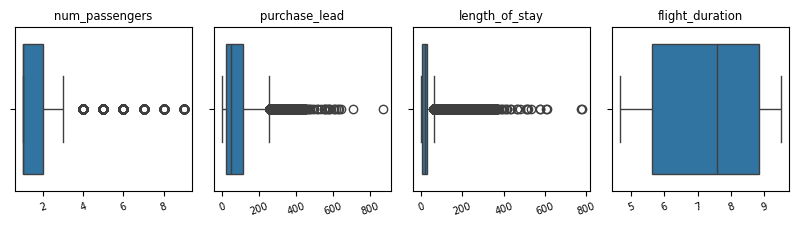

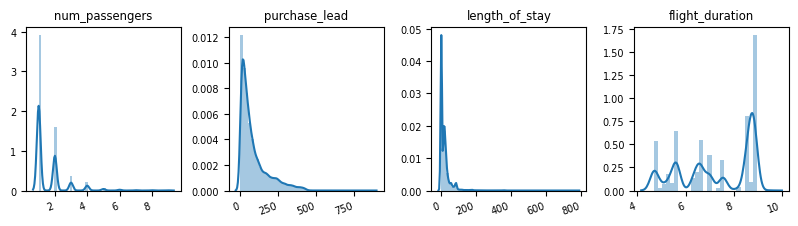

In [9]:
# check distribution numerical data
check_dist_num(df_EDA, num)

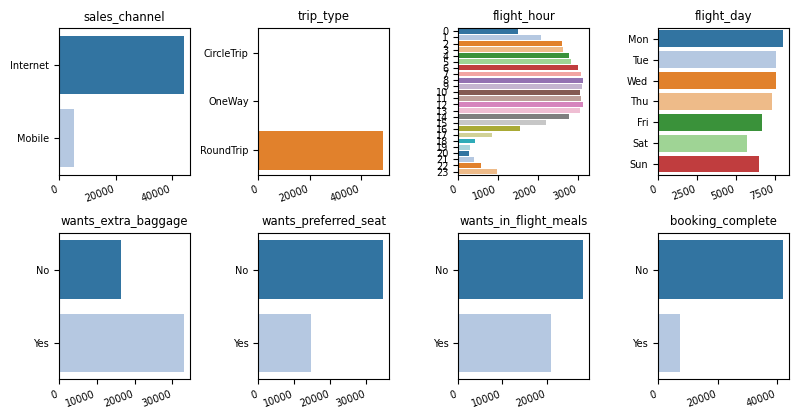

In [10]:
# check distribution categorical data
check_dist_cat(df_EDA, cat + target)

## Multivariate analysis

### Data distribution of whether the booking is completed or not

Check the distribution between `booking_complete` - "Yes" and `booking_complete` - "No" of each column provided in the dataset.

**Numerical features:**
- Customers with lower `flight_duration`, `length_of_stay`, and `purchase_lead` are more likely to complete their bookings.
- It is **hard to tell** in `num_passengers` since the two distribution doesn't seem different.

**Categorical features:**
- Customers using "Internet" (`sales_channel`) are more likely to complete their bookings.
- Customers with "RoundTrip" (`trip_type`) are more likely to complete their bookings, but remember that "RoundTrip" are very dominant.
- Customers choosing afternoon flight, 13.00 - 18.00, (`flight_hour`), are more likely to complete their bookings.
- **No clear pattern** is found in `flight_day`.
- Customers wanting extra baggage (`wants_extra_baggage`) are more likely to complete their bookings.
- Customers choosing preferred seat (`wants_preferred_seat`) are more likely to complete their bookings.
- Customers wanting inflight meals (`wants_in_flight_meals`) are relatively more likely to complete their bookings. (the difference between two categories seem miniscule)

> Key takeaways:
> - Numerical features that might be useful are `flight_duration`, `length_of_stay`, and `purchase_lead`.
> - Categorical feature that might be unseful are `flight_day`. Other than those might be useful.
> - But, we still need to perform hypothesis test to check their significant level.

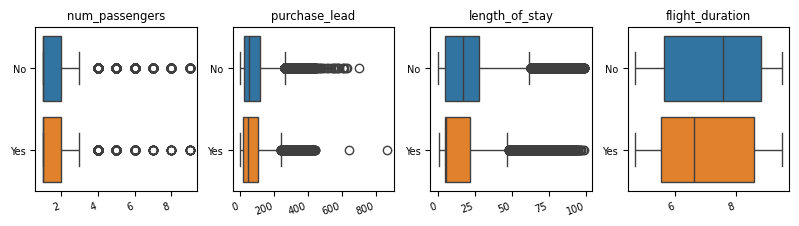

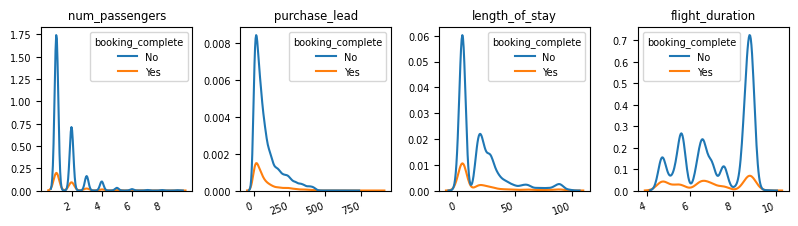

In [11]:
# check distribution numerical data aginst 'booking_complete' variable
multivariate_dist_num(df_EDA.query('length_of_stay < 100'), num, 'booking_complete')

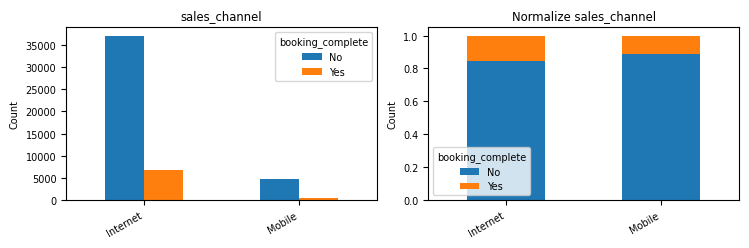

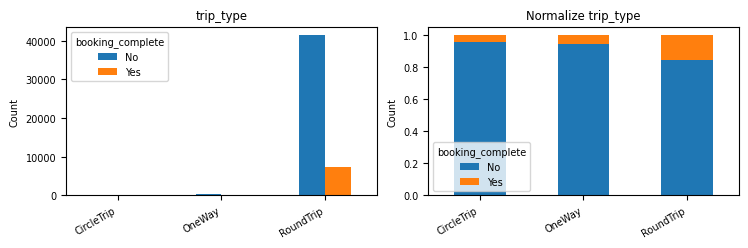

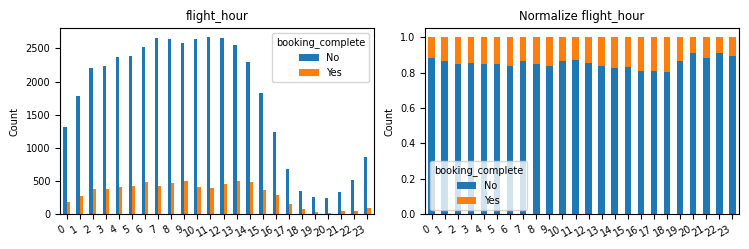

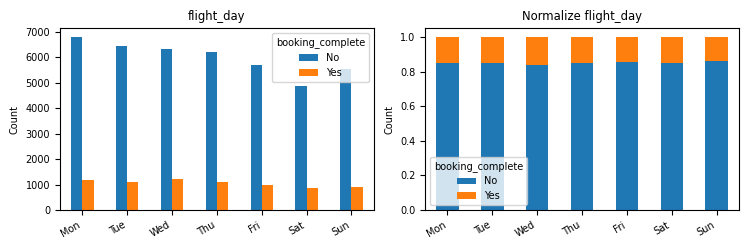

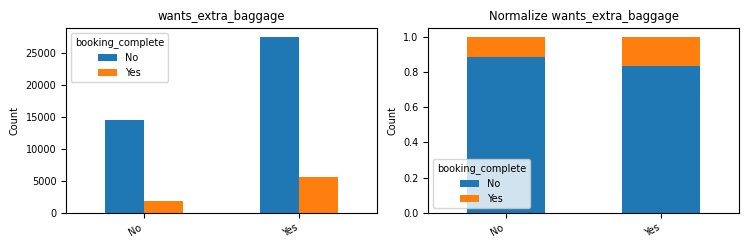

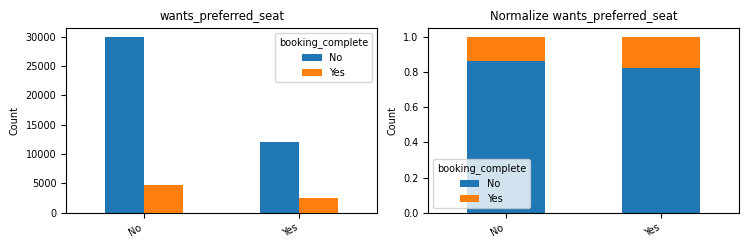

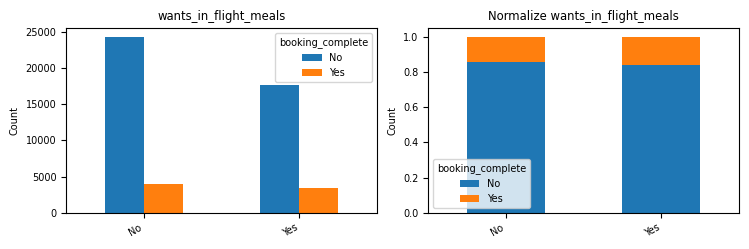

In [12]:
# check distribution categorical data aginst 'booking_complete' variable
multivariate_dist_cat(df_EDA, cat, 'booking_complete')

### Pairplot and correlation numerical features

> Key takeaways:
> - A small motonic relationships are found between pairwise `num_passengers` - `purchase_lead` (correlation = 0.26) and `length_of_stay` - `flight_duration` (correlation = 0.23).

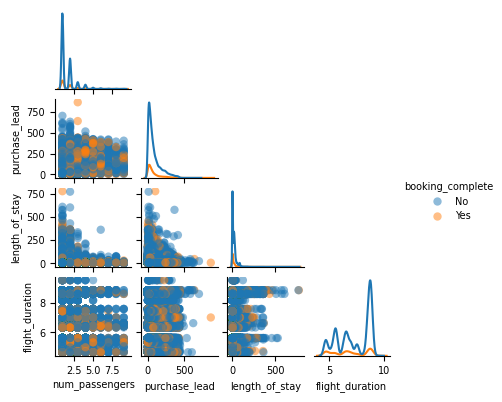

In [13]:
# pair plot of numerical features
sns.pairplot(data = df_EDA[num + ['booking_complete']], hue = 'booking_complete', height = 1,
             plot_kws = dict(marker = "o", alpha = 0.5, edgecolor = 'none'),
             diag_kws = dict(fill = False),
             corner = True)
plt.show()

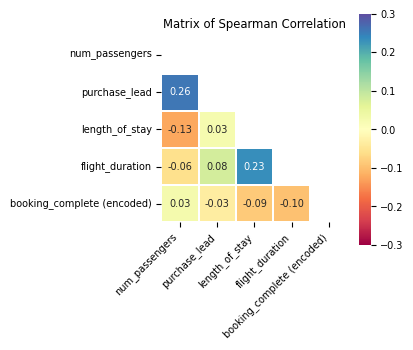

In [14]:
# pearson correlation
fig, ax = plt.subplots(figsize = (3, 3))
cor_matrix = df_EDA[num + ['booking_complete (encoded)']].corr(method = 'spearman')

mask = np.zeros_like(cor_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor_matrix, annot = True, fmt = '.2f', cmap = 'Spectral', 
            linewidths = 0.1,  mask = mask, vmin = -0.3, vmax = 0.3, square = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), ha = 'right', rotation = 45, color = 'black')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), va = 'center', rotation = 0, color = 'black')
plt.title('Matrix of Spearman Correlation')
plt.show()

fig.savefig('image/task 2/Matrix of Spearman Correlation.png', bbox_inches = 'tight', dpi = 300)

### Hypothesis test

In [15]:
import pingouin as pg
def chi_squared_test(data, columns, target, alpha = 0.05):
    p_values, results = [], []
    for col in columns:
        expected, observed, stats = pg.chi2_independence(data = data, x = col, y = target)
        p_value = stats[stats['test'] == 'pearson']['pval'].values[0]
        p_values.append(p_value)
        results.append(['reject H0 (good predictor)' if p_value <= alpha else 'accept H0 (bad predictor)'][0])
    output = pd.DataFrame({'feature':columns, 'p_value':p_values, 'result':results}).sort_values('p_value').set_index('feature')
    output.columns.name = 'Chi-Squared Test'
    output.index.name = f'target = {target}'
    return output

def kruskal_test(data, columns, target, alpha = 0.05):
    p_values, results = [], []
    for col in columns:
        stats = pg.kruskal(data = data, dv = col, between = target)
        p_value = stats['p-unc'].values[0]
        p_values.append(p_value)
        results.append(['reject H0 (good predictor)' if p_value <= alpha else 'accept H0 (bad predictor)'][0])
    output = pd.DataFrame({'feature':columns, 'p_value':p_values, 'result':results}).sort_values('p_value').set_index('feature')
    output.columns.name = 'Kruskal-Wallis H test'
    output.index.name = f'target = {target}'
    return output

#### Numerical features

For numerical features we will use Kruskal-Wallis H test, and here are the hypotheses:
1. $H_0$ (Null Hypothesis): There are no significant differences among the groups. In other words, the population distributions of all groups are equal. (meaning **independent** each other, i.e. **bad predictor**).
2. $H_1$ (Alternate Hypothesis): At least one group is different from the others. In other words, there is at least one group with a population distribution that is not equal to the others. (meaning **dependent** each other, i.e. **good predictor**).

If p-values < $\alpha$ which is 0.05, then reject $H_0$ &rarr; the variable is a good predictor.

> Key takeaways:
> - **All numerical features** stored in `num` variable can be used for the input in ML model since their corresponding p-values are less than significance level $\alpha$, meaning they are all good predictors.
> - `num` variable contains features such as `num_passengers`, `purchase_lead`, `length_of_stay`, and `flight_duration`.

In [16]:
# perform Kruskal-Wallis H test
output = kruskal_test(df_EDA, num, 'booking_complete')
output

Kruskal-Wallis H test,p_value,result
target = booking_complete,,
flight_duration,1.119739e-104,reject H0 (good predictor)
length_of_stay,1.924622e-82,reject H0 (good predictor)
purchase_lead,8.341268e-14,reject H0 (good predictor)
num_passengers,1.135092e-09,reject H0 (good predictor)


#### Categorical features

For categorical features we will use Chi-Squared test, and here are the hypotheses:
1. $H_0$ (Null Hypothesis): Two categorical variables to be compared are **independent** each other (**bad predictor**), if the observed and expected frequencies are similar.
2. $H_1$ (Alternate Hypothesis): Two categorical variables to be compared are **dependent** each other (**good predictor**), if the observed and expected frequencies are dissimilar.

If p-values < $\alpha$ which is 0.05, then reject $H_0$ &rarr; the variable is a good predictor.

> Key takeaways:
> - **All categorical features** stored in `cat` variable can be used for the input in ML model since their corresponding p-values are less than significance level $\alpha$, meaning they are all good predictors.
> - `cat` variable contains features such as `sales_channel`, `trip_type`, `flight_hour`, `flight_day`, `wants_extra_baggage`, `wants_preferred_seat`, and `wants_in_flight_meals`.

In [17]:
# perform Chi-Squared test
output = chi_squared_test(df_EDA, cat, 'booking_complete')
output

Chi-Squared Test,p_value,result
target = booking_complete,,
wants_extra_baggage,4.621879e-52,reject H0 (good predictor)
wants_preferred_seat,9.178129e-29,reject H0 (good predictor)
flight_hour,1.359073e-19,reject H0 (good predictor)
sales_channel,3.081390e-18,reject H0 (good predictor)
trip_type,2.086064e-09,reject H0 (good predictor)
wants_in_flight_meals,4.985918e-09,reject H0 (good predictor)
flight_day,2.414031e-02,reject H0 (good predictor)


### Deep dive our analysis

Based on the hypothesis test previously, we can see that features having the lowest p-values are `wants_extra_baggage`, `wants_preferred_seat`, and `flight_hour` for categorical features, and then `flight_duration` and `length_of_stay` for numerical features. Let's analyze these features more deep.

In [18]:
# function to plot dual axis plot
def dual_axis_plot(data, x, y1, y2, aggfunc1, aggfunc2, name1, name2, name_x, title, bar_and_line_plot = True, sort_aggfunc1 = False, ascending_order = True, fontsize = 7, figsize = (6, 2.5)):
    # prepare the primary y-axis data and secondary y-axis data in which is grouped by x-axis variable
    prim_axis = data.groupby(x).agg({y1:aggfunc1}).rename({y1:name1}, axis = 1)
    second_axis = data.groupby(x).agg({y2:aggfunc2}).rename({y2:name2}, axis = 1)
    index_order = prim_axis.index
    palette = 'tab20'
    if (sort_aggfunc1 == True) & (bar_and_line_plot == True):
        prim_axis = prim_axis.sort_values(name1, ascending = ascending_order)
        index_order = prim_axis.index
        second_axis = second_axis.loc[index_order]
        palette = 'Blues'
    prim_axis.reset_index(inplace = True)
    second_axis.reset_index(inplace = True)
    if (bar_and_line_plot == True) and (prim_axis.iloc[:, 0].dtype != 'object'): 
        prim_axis.iloc[:, 0] = prim_axis.iloc[:, 0].astype(str)
        second_axis.iloc[:, 0] = second_axis.iloc[:, 0].astype(str)
        
    # plot the dual axis graph
    fig, ax1 = plt.subplots(figsize = figsize)
    if bar_and_line_plot == True:                       # this plot for categorical variable on x-axis
        ax2 = ax1.twinx()
        sns.barplot(data = prim_axis, x = x, y = name1, ax = ax1, palette = palette)
        sns.lineplot(data = second_axis, x = x, y = name2, ax = ax2, marker = 'o', color = 'darkred')
        ax1.set_xticklabels(index_order, rotation = 30, ha = 'right',  color = 'black', fontsize = fontsize)
        ax1.set_xlabel(x, color = 'black', fontsize = fontsize)
    else:                                               # this plot for numerical variable on x-axis
        sns.distplot(data[x], kde = True, ax = ax1)
        ax2 = ax1.twinx()
        second_axis.plot(x = x, y = name2, kind = 'scatter', ax = ax2, color = 'darkred')
        ax1.set_xlabel(x, color = 'black', fontsize = fontsize)         
    plt.title(title, color = 'black', fontsize = fontsize * 1.25)
    ax1.set_ylabel(name1, color = '#1f77b4', fontsize = fontsize)
    ax1.tick_params(axis = 'y', labelcolor = '#1f77b4')
    ax2.set_ylabel(name2, color = 'darkred', fontsize = fontsize)
    ax2.tick_params(axis = 'y', labelcolor = 'darkred')
    ax1.set_xlabel(name_x, fontsize = fontsize)
    ax2.grid(False)
    plt.show()
    return fig

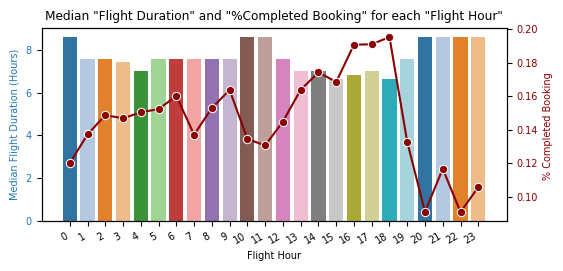

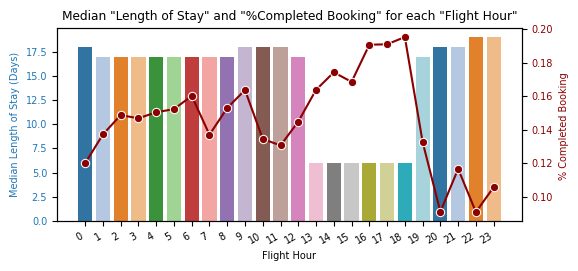

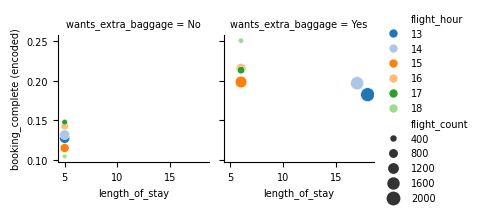

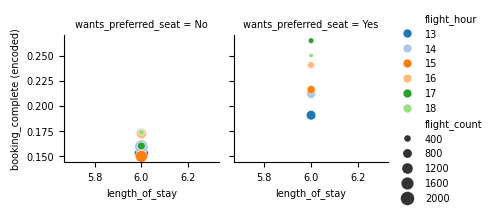

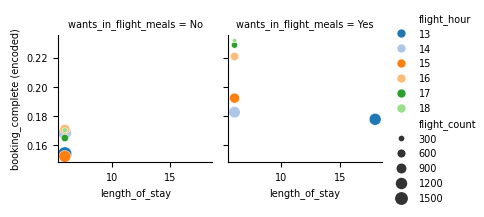

In [19]:
# Median "Flight Duration" and "%Completed Booking" for each "Flight Hour"
fig1 = dual_axis_plot(data = df_EDA, 
                      x = 'flight_hour', y1 = 'flight_duration', y2 = 'booking_complete (encoded)', 
                      aggfunc1 = 'median', aggfunc2 = 'mean', 
                      name1 = 'Median Flight Duration (Hours)', name2 = '% Completed Booking ', name_x = 'Flight Hour', 
                      title = 'Median "Flight Duration" and "%Completed Booking" for each "Flight Hour"', 
                      bar_and_line_plot = True, sort_aggfunc1 = False)
fig1.savefig('image/task 2/Med flight_duration and %booking_complete by flight_hour.png', bbox_inches = 'tight', dpi = 300)

# Median "Length of Stay" and "%Completed Booking" for each "Flight Hour"
fig2 = dual_axis_plot(data = df_EDA, 
                      x = 'flight_hour', y1 = 'length_of_stay', y2 = 'booking_complete (encoded)', 
                      aggfunc1 = 'median', aggfunc2 = 'mean', 
                      name1 = 'Median Length of Stay (Days)', name2 = '% Completed Booking ', name_x = 'Flight Hour', 
                      title = 'Median "Length of Stay" and "%Completed Booking" for each "Flight Hour"', 
                      bar_and_line_plot = True, sort_aggfunc1 = False)
fig2.savefig('image/task 2/Med length_of_stay and %booking_complete by flight_hour.png', bbox_inches = 'tight', dpi = 300)

# examine "Afternoon Flights" with their extra features (baggage, preferred seat, and meals)
afternoon_flights = df_EDA[df_EDA['flight_hour'].isin(np.arange(13, 18 + 1, 1))]
afternoon_flights['flight_hour'] = afternoon_flights['flight_hour'].cat.set_categories(np.arange(13, 18 + 1, 1), ordered = True)
for wants_extra in ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']:   
    afternoon_flights_n_wants_extra_feature = afternoon_flights.groupby(['flight_hour', wants_extra])\
                                                               .agg({'booking_complete (encoded)':'mean',
                                                                     'length_of_stay':'median',
                                                                     'flight_count':'count'}).reset_index()
    sns_plot = sns.relplot(data = afternoon_flights_n_wants_extra_feature, 
                x = 'length_of_stay', y = 'booking_complete (encoded)', 
                hue = 'flight_hour', size = 'flight_count', sizes = (10, 100), col = wants_extra, height = 2, palette = 'tab20')
    plt.show()
    sns_plot.savefig(f'image/task 2/replot {wants_extra}.png', bbox_inches = 'tight', dpi = 300)

From the barplot above indicating that customers choosing afternoon flights (13.00 to 18.00 `flight_hour`) are more likely to complete their bookings (`booking_complete = 'Yes'`), and those type of customers are most likely the ones who spend a week on their destination (median `length_of_stay` is 6) and have quite lower flight duration (median `flight_duration` is below 7).  

As a reminder, there is a relatively positive small motonic relationship between `length_of_stay` and `flight_duration` (spearman corr = 0.23), and if we see the boxplot previously, customers with lower `flight_duration` and `length_of_stay` are more likely to complete their bookings, and we found that **this more likely to happen for customers choosing afternoon flights!**

From the scatterplot above we plot the data only for only "afternoon flights" and differentiate between wheter the customers want extra feature (`wants_extra_baggage`, `wants_preferred_seat`, and `wants_in_flight_meals`) or not. Turns out that our customers having afternoon flights and length of stay less than a week are more likely to complete their bookings when wanting some extra features!

## Feature engineering

In [20]:
# create empty list to store some new engineered features in the next part
new_features = []

### Examine features with too many category values

Two features having too many category values are `booking_origin` and `route`. We will experiment on those features, probably we could make them more useful by engineered those features.

#### booking_origin

- Booking flight are dominantly made from Australia indicating that British Aiways' base customers are from this country.  

> Key takeaways:
> - New feature has been made named `booking_origin_Australia` describing whether the booking was made from Australia or not.
> - Bookings not made from Australia are more likely to be completed by customers.
> - This feature has zero p-values indicating that this a good predictor.

In [21]:
# check distribution of 'booking_origin'
df_EDA['booking_origin'].value_counts().head(20)

booking_origin
Australia         17691
Malaysia           7055
South Korea        4502
Japan              3819
China              3284
Indonesia          2317
Taiwan             2042
Thailand           1993
India              1258
New Zealand        1060
Singapore          1034
United States       453
Vietnam             386
Macau               301
Hong Kong           294
Philippines         265
United Kingdom      173
Brunei              161
Cambodia            131
(not set)            78
Name: count, dtype: int64

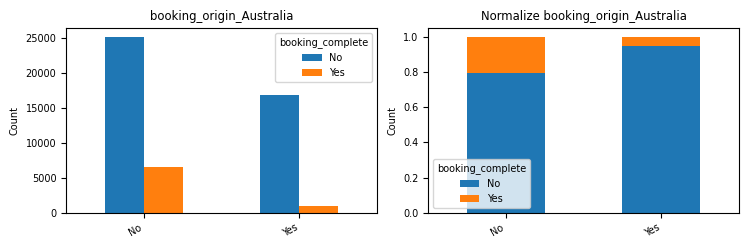

Chi-Squared Test,p_value,result
target = booking_complete,,
booking_origin_Australia,0.0,reject H0 (good predictor)


In [22]:
# create a new feature wheter the customers' books from Australia or not
df_EDA['booking_origin_Australia'] = df_EDA['booking_origin'].apply(lambda x: 'Yes' if x in ['Australia'] else 'No')
df['booking_origin_Australia'] = df['booking_origin'].apply(lambda x: 1 if x in ['Australia'] else 0)

# check distribution and perform hypothesis test
multivariate_dist_cat(df_EDA, ['booking_origin_Australia'], 'booking_complete')
output = chi_squared_test(df_EDA, ['booking_origin_Australia'], 'booking_complete')
display(output)

new_features.append('booking_origin_Australia')

#### route

From the `route` column we can extract two information, that are flight departure and flight arrival. Flight departure are described in the first three letters in `route` column, meanwhile flight arrival in the last three letters.

From each `departure` and `arrival` features, we will drop down again the number of unique categories within the features, since the unique categories are still relatively high (60+ unique categories).

To drop down the number of unique categories we will select some particular airports with a threshold giving the highest %completed booking, and create two new features called `top_departure` and `top_arrival` containing the top airport for `deparature` and `arrival` which make the customers more likely to complete their bookings. 

> Key takeaways:
> - New features have been made named `top_departure` and `top_arrival` describing whether the airports are on the top highest percentage making customers to complete their bookings.
> - Bookings made from `top_departure` and `top_arrival` airports are more likely to be completed by customers.
> - This feature has zero p-values indicating that this a good predictor.

In [23]:
# extract 'departure' and 'arrival' information in 'route'
df_EDA['departure'] = df_EDA['route'].apply(lambda x: x[:3])
df_EDA['arrival'] = df_EDA['route'].apply(lambda x: x[-3:])
df['departure'] = df['route'].apply(lambda x: x[:3])
df['arrival'] = df['route'].apply(lambda x: x[-3:])

print(f'# of unique categories in route {df_EDA.route.nunique()}')
print(f'# of unique categories in departue {df_EDA.departure.nunique()}')
print(f'# of unique categories in arrival {df_EDA.arrival.nunique()}')

# of unique categories in route 799
# of unique categories in departue 85
# of unique categories in arrival 64


top_departure
No     25641
Yes    23640
Name: count, dtype: int64

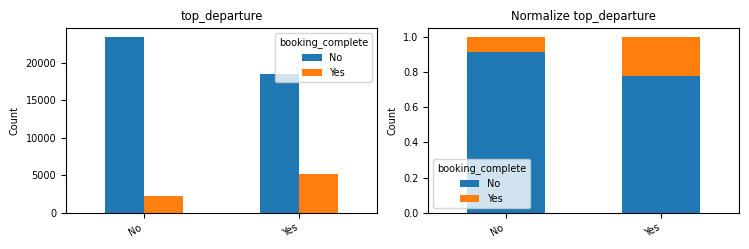

Chi-Squared Test,p_value,result
target = booking_complete,,
top_departure,0.0,reject H0 (good predictor)


In [24]:
# find airport with the highest %completed booking on 'departure' - I choose 0.14 completed booking as the threshold
threshold = 0.14
crosstab = pd.crosstab(df_EDA['departure'], df_EDA['booking_complete'])
crosstab_normalize = crosstab.div(crosstab.sum(axis = 1), axis = 0).sort_values('Yes', ascending = False)
top_departure_completed_booking = crosstab_normalize[crosstab_normalize['Yes'] > threshold].index.tolist()

# create a new feature - 'top_departure'
df_EDA['top_departure'] = df_EDA['departure'].apply(lambda x: 'Yes' if x in top_departure_completed_booking else 'No')
df['top_departure'] = df['departure'].apply(lambda x: 1 if x in top_departure_completed_booking else 0)
display(df_EDA['top_departure'].value_counts())

# check distribution and perform hypothesis test
multivariate_dist_cat(df_EDA, ['top_departure'], 'booking_complete')
output = chi_squared_test(df_EDA, ['top_departure'], 'booking_complete')
display(output)

new_features.append('top_departure')

top_arrival
No     26063
Yes    23218
Name: count, dtype: int64

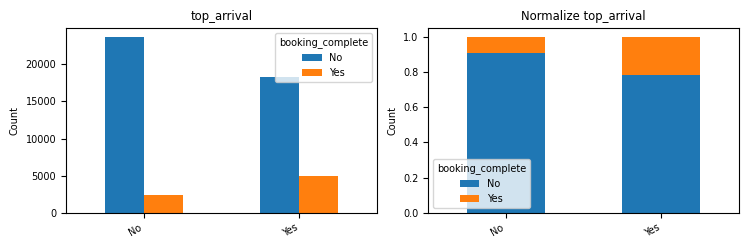

Chi-Squared Test,p_value,result
target = booking_complete,,
top_arrival,0.0,reject H0 (good predictor)


In [25]:
# find airport with the highest %completed booking on 'arrival' - I choose 0.14 completed booking as the threshold
threshold = 0.14
crosstab = pd.crosstab(df_EDA['arrival'], df_EDA['booking_complete'])
crosstab_normalize = crosstab.div(crosstab.sum(axis = 1), axis = 0).sort_values('Yes', ascending = False)
top_arrival_completed_booking = crosstab_normalize[crosstab_normalize['Yes'] > threshold].index.tolist()

# create a new feature - 'top_arrival'
df_EDA['top_arrival'] = df_EDA['arrival'].apply(lambda x: 'Yes' if x in top_arrival_completed_booking else 'No')
df['top_arrival'] = df['arrival'].apply(lambda x: 1 if x in top_arrival_completed_booking else 0)
display(df_EDA['top_arrival'].value_counts())

# check distribution and perform hypothesis test
multivariate_dist_cat(df_EDA, ['top_arrival'], 'booking_complete')
output = chi_squared_test(df_EDA, ['top_arrival'], 'booking_complete')
display(output)

new_features.append('top_arrival')

### Create afternoon flights feature

As we saw previously, "afternoon flights" make customers to complete their booking. We can create a new feature from this case.

> Key takeaways:
> - New features have been made named `afternoon_flight` describing whether "Afternoon Flights" are booked by customers or not.
> - "Afternoon Flights" booking are more likely to be completed by customers.
> - This feature can be a good predictor.

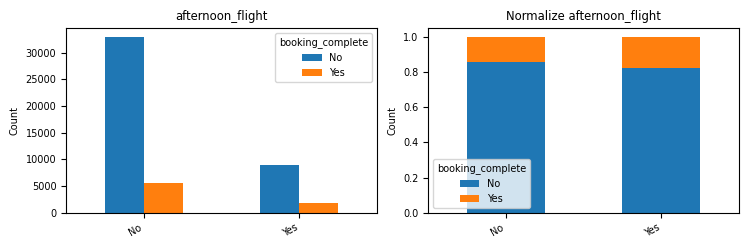

Chi-Squared Test,p_value,result
target = booking_complete,,
afternoon_flight,4.090457e-16,reject H0 (good predictor)


In [26]:
# create a new feature for "Afternoon Flights"
df_EDA['afternoon_flight'] = df_EDA['flight_hour'].apply(lambda x: 'Yes' if x in np.arange(13, 18 + 1, 1) else 'No')
df['afternoon_flight'] = df['flight_hour'].apply(lambda x: 1 if x in np.arange(13, 18 + 1, 1) else 0)

# check distribution and perform hypothesis test
multivariate_dist_cat(df_EDA, ['afternoon_flight'], 'booking_complete')
output = chi_squared_test(df_EDA, ['afternoon_flight'], 'booking_complete')
display(output)

new_features.append('afternoon_flight')

### Create total extra feature

> Key takeaways:
> - New features have been made named `total_extra_features` describing the total number of extra features (baggage, preferred seat, and inflight meals) wanted by customers.
> - "Afternoon Flights" booking are more likely to be completed by customers.
> - This feature can be a good predictor.

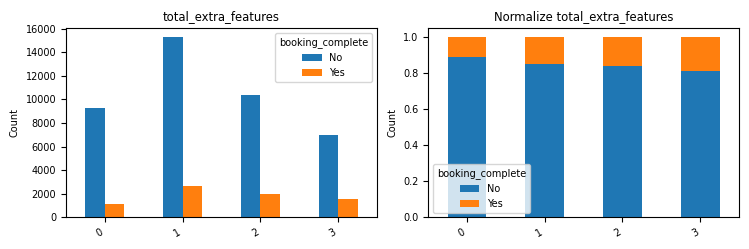

Chi-Squared Test,p_value,result
target = booking_complete,,
total_extra_features,7.615601e-54,reject H0 (good predictor)


In [27]:
# create a new feature - 'total_extra_features'
df_EDA['total_extra_features'] = df_EDA[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].replace({'Yes':1, 'No':0}).astype('int64').sum(axis = 1)
df['total_extra_features'] = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].replace({'Yes':1, 'No':0}).astype('int64').sum(axis = 1)
                                            
# check distribution and perform hypothesis test
multivariate_dist_cat(df_EDA, ['total_extra_features'], 'booking_complete')
output = chi_squared_test(df_EDA, ['total_extra_features'], 'booking_complete')
display(output)

new_features.append('total_extra_features')

### Create cyclical features

As I have talked about in the "Data Profiling" section, we need "Cyclical Encoding" for the date-time data such as `flight_hour` and `flight_day`. Note that when we use cyclical encoding, two new features will be created with the formulas as follows:

$$x = \sin(2\pi \frac{a}{max(a)})$$
$$y = \cos(2\pi \frac{a}{max(a)})$$

Where $a$ is the feature values and always started by zero.

For example if we have a feature months in a year which the values would be 1 for January, 2 for February, ..., until 12 for December. Then when we use the formulas above, we need to shift the values by one such that it extends from 0 for January, 1 for February, ..., until 11 December.

#### flight_hour

In [28]:
# check the min and max values
print('min:', df_EDA['flight_hour'].astype(int).min())
print('max:', df_EDA['flight_hour'].astype(int).max())

min: 0
max: 23


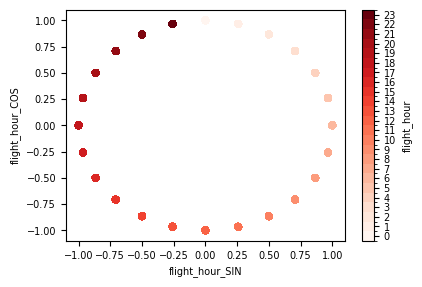

In [29]:
# create two new features - 'flight_hour_SIN' and 'flight_hour_COS'
df_EDA['flight_hour_SIN'] = np.sin(2*np.pi * (df_EDA['flight_hour'].astype(int)/24))
df_EDA['flight_hour_COS'] = np.cos(2*np.pi * (df_EDA['flight_hour'].astype(int)/24))
df['flight_hour_SIN'] = np.sin(2*np.pi * (df['flight_hour'].astype(int)/24))
df['flight_hour_COS'] = np.cos(2*np.pi * (df['flight_hour'].astype(int)/24))

# plot the new features
fig, ax = plt.subplots()
df_EDA.plot(kind = 'scatter', x = 'flight_hour_SIN', y = 'flight_hour_COS', c = 'flight_hour', cmap = 'Reds', ax = ax, figsize = (4.5, 3))
ax.set(xlabel = 'flight_hour_SIN', ylabel = 'flight_hour_COS')
plt.show()

new_features.append('flight_hour_SIN')
new_features.append('flight_hour_COS')

#### flight_day

In [30]:
# encode day to numerical types
def encode_day(x):
    if x == 'Mon':
        return 0
    elif x == 'Tue':
        return 1
    elif x == 'Wed':
        return 2
    elif x == 'Thu':
        return 3
    elif x == 'Fri':
        return 4
    elif x == 'Sat':
        return 5
    elif x == 'Sun':
        return 6
    
df_EDA['flight_day (encoded)'] = df_EDA['flight_day'].astype('object').apply(lambda x: encode_day(x))
df['flight_day (encoded)'] = df['flight_day'].astype('object').apply(lambda x: encode_day(x))

# check the min and max values
print('min:', df_EDA['flight_day (encoded)'].astype(int).min())
print('max:', df_EDA['flight_day (encoded)'].astype(int).max())

min: 0
max: 6


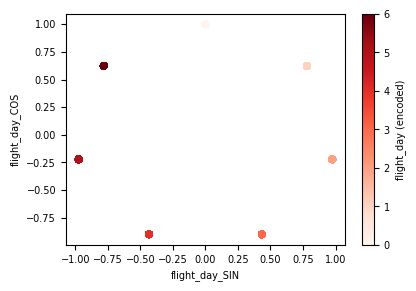

In [31]:
# create two new features - 'flight_day_SIN' and 'flight_day_COS'
df_EDA['flight_day_SIN'] = np.sin(2*np.pi * (df_EDA['flight_day (encoded)']/7))
df_EDA['flight_day_COS'] = np.cos(2*np.pi * (df_EDA['flight_day (encoded)']/7))
df['flight_day_SIN'] = np.sin(2*np.pi * (df['flight_day (encoded)']/7))
df['flight_day_COS'] = np.cos(2*np.pi * (df['flight_day (encoded)']/7))

# plot the new features
fig, ax = plt.subplots()
df_EDA.plot(kind = 'scatter', x = 'flight_day_SIN', y = 'flight_day_COS', c = 'flight_day (encoded)', cmap = 'Reds', ax = ax, figsize = (4.5, 3))
ax.set(xlabel = 'flight_day_SIN', ylabel = 'flight_day_COS')
plt.show()

new_features.append('flight_day_SIN')
new_features.append('flight_day_COS')

### Create weekend flight feature

Let's try to create whether a flight is at weeekend or not.

> Key takeaways:
> - New features have been made named `weekend_flight` describing whether "Weekend Flights" are booked by customers or not.
> - No clear pattern here.
> - This feature is **bad predictor**. Hence we will not incorporate this feature.

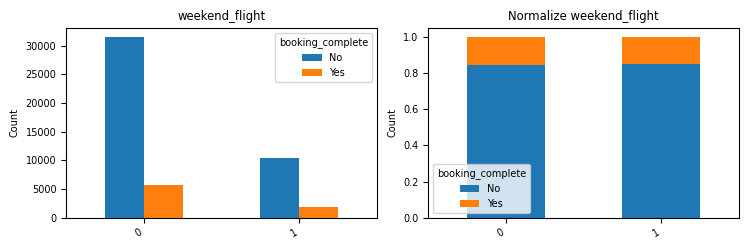

Chi-Squared Test,p_value,result
target = booking_complete,,
weekend_flight,0.089868,accept H0 (bad predictor)


In [32]:
# encode weekend
def encode_weekend(x):
    if x == 'Sat':
        return 1
    elif x == 'Sun':
        return 1
    else:
        return 0
    
# create a new feature for "Weekend Flights"
df_EDA['weekend_flight'] = df_EDA['flight_day'].apply(lambda x: encode_weekend(x))
df['weekend_flight'] = df['flight_day'].apply(lambda x: encode_weekend(x))

# check distribution and perform hypothesis test
multivariate_dist_cat(df_EDA, ['weekend_flight'], 'booking_complete')
output = chi_squared_test(df_EDA, ['weekend_flight'], 'booking_complete')
display(output)

# Modeling

Below here are functions to help us evaluating the model performance.

In [33]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import metrics
from sklearn.calibration import calibration_curve

from lightgbm import LGBMClassifier

# helper function
def class_distribution(data_input, name, target):
    fig, ax = plt.subplots()
    sns.countplot(data = data_input, x = target, hue = target)
    plt.title(name)
    plt.show()
    
# helper function
def model_eval(model, name, X_train, X_test, y_train, y_test, CV_evaluation = True, show_reports = True, show_plots = False):
    print(25*'=', 'model evaluation - {}'.format(name), 25*'=')
    # calculate the model predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    
    # compute the model performances
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train).round(3)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test).round(3)
    roc_auc_train = metrics.roc_auc_score(y_train, y_pred_proba_train).round(3)
    roc_auc_test = metrics.roc_auc_score(y_test, y_pred_proba_test).round(3)
    precision_train = metrics.precision_score(y_train, y_pred_train).round(3)
    precision_test = metrics.precision_score(y_test, y_pred_test).round(3)
    recall_train = metrics.recall_score(y_train, y_pred_train).round(3)
    recall_test = metrics.recall_score(y_test, y_pred_test).round(3)
    f1_train = metrics.f1_score(y_train, y_pred_train).round(3)
    f1_test = metrics.f1_score(y_test, y_pred_test).round(3)
    if CV_evaluation == True:
        roc_auc_cv = cross_validate(estimator = model, X = X_train, y = y_train, 
                                    cv = 5, scoring = 'roc_auc', return_train_score = True)
        # create a dictionary of lists of model performances
        model_performances = {'ROC AUC':[accuracy_train, accuracy_test],
                              'ROC AUC 5-CV train set (train and validate)':['{} ± {}'.format(roc_auc_cv['train_score'].mean().round(3), roc_auc_cv['train_score'].std().round(3)),
                                                                 '{} ± {}'.format(roc_auc_cv['test_score'].mean().round(3), roc_auc_cv['test_score'].std().round(3))],                         
                              'precision':[precision_train, precision_test],
                              'recall':[recall_train, recall_test],
                              'f1-score':[f1_train, f1_test],
                              'accuracy':[accuracy_train, accuracy_test]}
    elif CV_evaluation == False:    
        # create a dictionary of lists of model performances
        model_performances = {'ROC AUC':[accuracy_train, accuracy_test],
                              'precision':[precision_train, precision_test],
                              'recall':[recall_train, recall_test],
                              'f1-score':[f1_train, f1_test],
                              'accuracy':[accuracy_train, accuracy_test]}
    
    # create a dataframe of model performances
    tuples = [(name, 'train'),
              (name, 'test')]
    results = pd.DataFrame(model_performances, index = pd.MultiIndex.from_tuples(tuples))
    
    if show_reports == True:
        print('Classification Report on Test Set: \n{}'.format(metrics.classification_report(y_test, y_pred_test, target_names = ['non-default', 'default'])))
        print('Confusion Matrix on Test Set: \n{}'.format(metrics.confusion_matrix(y_test, y_pred_test)))
    if show_plots == True:
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_test)
        prec, rec, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba_test)
        frac_pos, avg_pred = calibration_curve(y_test, y_pred_proba_test, n_bins = 10)
        fig, ax = plt.subplots(figsize = (9, 2.5), nrows = 1, ncols = 3)
        
        ax[0].plot(fpr, tpr)
        ax[0].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate', title = 'ROC Curve')
        ax[0].plot([0, 1], [0, 1], 'k--')
        ax[0].legend([name, 'No Skill'])
        
        ax[1].plot(rec, prec)
        ax[1].set(xlabel = 'Recall', ylabel = 'Precision', title = 'Precision-Recall Curve')
        ax[1].plot([0, 1], [0, 0], 'k--')
        ax[1].legend([name, 'No Skill'])
        
        ax[2].plot(avg_pred, frac_pos, 's-')
        ax[2].set(xlabel = 'Average Predicted Probability', ylabel = 'Fraction of Positive Classes', title = 'Calibration Curve')
        ax[2].plot([0, 1], [0, 1], 'k:') 
        ax[2].legend([name, 'Perfectly calibrated'])
        plt.tight_layout()
        plt.show()
    return results

## Data preprocessing

Note that features that will be used for building ML model are stored in,
- `num` for numerical features, 
- `cat` for categorical features, and 
- `new_features` for engineered features.

Two features need to be preprocessed, that are `sales_channel` and `trip_type` having categorical types, and other than those two features are already been in numerical types which is what the ML model will expect.

> Key takeaways:
> - Since the algorithm in tree-based model is not sensitive with the scale of features, and we will use tree-based model (LightGBM), We are not going to scale the features.
> - The final dataset used for modeling is `df_modeling_preprocessed`.

In [34]:
# create a new DataFrame called "df_modeling" for building ML model
df_modeling = df.copy()[num + [col for col in cat if col not in ['flight_day', 'flight_hour']] + new_features + target]

# check info
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49281 entries, 0 to 49280
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num_passengers            49281 non-null  int64  
 1   purchase_lead             49281 non-null  int64  
 2   length_of_stay            49281 non-null  int64  
 3   flight_duration           49281 non-null  float64
 4   sales_channel             49281 non-null  object 
 5   trip_type                 49281 non-null  object 
 6   wants_extra_baggage       49281 non-null  int64  
 7   wants_preferred_seat      49281 non-null  int64  
 8   wants_in_flight_meals     49281 non-null  int64  
 9   booking_origin_Australia  49281 non-null  int64  
 10  top_departure             49281 non-null  int64  
 11  top_arrival               49281 non-null  int64  
 12  afternoon_flight          49281 non-null  int64  
 13  total_extra_features      49281 non-null  int64  
 14  flight

In [35]:
# preprocessed 'sales_channel' and 'trip_type' with One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(categories = [['Mobile', 'Internet'], 
                                  ['CircleTrip', 'OneWay', 'RoundTrip']], drop = 'first')
OHE_results = OHE.fit_transform(df_modeling[['sales_channel', 'trip_type']])
OHE_columns = OHE.get_feature_names_out()

# store as a new DataFrame
df_OHE = pd.DataFrame(OHE_results.todense(), columns = OHE_columns).astype('int64')

# concate all data and store as new DataFrame called "df_modeling_preprocessed"
df_modeling_preprocessed = pd.concat([df_OHE, df_modeling.select_dtypes(exclude = 'object')], axis = 1)
display(df_modeling_preprocessed.head())

# check info
df_modeling_preprocessed.info()

,sales_channel_Internet,trip_type_OneWay,trip_type_RoundTrip,num_passengers,purchase_lead,length_of_stay,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_origin_Australia,top_departure,top_arrival,afternoon_flight,total_extra_features,flight_hour_SIN,flight_hour_COS,flight_day_SIN,flight_day_COS,booking_complete
0,1,0,1,2,262,19,5.52,1,0,0,0,1,0,0,1,0.965926,-0.258819,-0.974928,-0.222521,0
1,1,0,1,1,112,20,5.52,0,0,0,0,1,0,0,0,0.707107,0.707107,-0.974928,-0.222521,0
2,1,0,1,2,243,22,5.52,1,1,0,0,1,0,1,2,-0.965926,-0.258819,0.974928,-0.222521,0
3,1,0,1,1,96,31,5.52,0,0,1,0,1,0,0,1,0.866025,0.500000,-0.974928,-0.222521,0
4,1,0,1,2,68,22,5.52,1,0,1,0,1,0,1,2,-0.707107,-0.707107,0.974928,-0.222521,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49281 entries, 0 to 49280
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sales_channel_Internet    49281 non-null  int64  
 1   trip_type_OneWay          49281 non-null  int64  
 2   trip_type_RoundTrip       49281 non-null  int64  
 3   num_passengers            49281 non-null  int64  
 4   purchase_lead             49281 non-null  int64  
 5   length_of_stay            49281 non-null  int64  
 6   flight_duration           49281 non-null  float64
 7   wants_extra_baggage       49281 non-null  int64  
 8   wants_preferred_seat      49281 non-null  int64  
 9   wants_in_flight_meals     49281 non-null  int64  
 10  booking_origin_Australia  49281 non-null  int64  
 11  top_departure             49281 non-null  int64  
 12  top_arrival               49281 non-null  int64  
 13  afternoon_flight          49281 non-null  int64  
 14  total_

## Build the model

`LGBMClassifier` model will be used to train the data.

### Baseline model

This will be our baseline model where we don't perform any treatment to handle the imbalanced class problem.

> Key takeaways:
> - Indeed the imbalanced class problem will make our ML model performing the worst where the model only can correctly predict the negative class (`booking_complete = 0`) since our model will be biased towards the majority class.

In [36]:
# split the data
X = df_modeling_preprocessed.drop(target, axis = 1)
y = df_modeling_preprocessed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# check the data
print(f'X_train shape: {X_train.shape} | y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} | y_test shape: {y_test.shape}')
# class_distribution(y_train, 'y_train', 'booking_complete')

X_train shape: (34496, 19) | y_train shape: (34496, 1)
X_test shape: (14785, 19) | y_test shape: (14785, 1)


========================= model evaluation - LGBM_baseline =========================
Classification Report on Test Set: 
              precision    recall  f1-score   support

 non-default       0.85      0.99      0.92     12568
     default       0.44      0.03      0.05      2217

    accuracy                           0.85     14785
   macro avg       0.64      0.51      0.48     14785
weighted avg       0.79      0.85      0.79     14785

Confusion Matrix on Test Set: 
[[12492    76]
 [ 2158    59]]


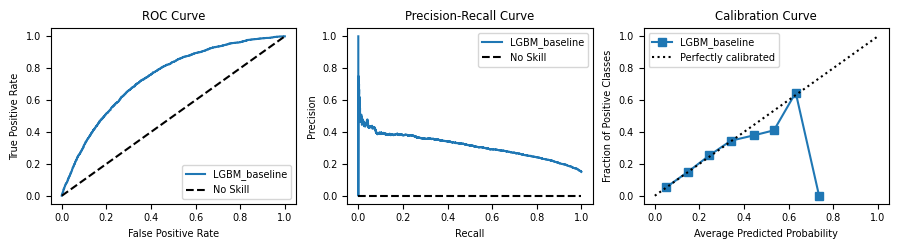

ROC AUC ROC AUC 5-CV train set (train and validate)  \
LGBM_baseline train    0.856                               0.839 ± 0.002   
              test     0.849                               0.738 ± 0.005   

                     precision  recall  f1-score  accuracy  
LGBM_baseline train      0.810   0.051     0.096     0.856  
              test       0.437   0.027     0.050     0.849

In [37]:
# fit the model
LGBM_baseline = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 42, verbose = 0)
LGBM_baseline.fit(X_train, y_train)

# evaluate the model
df_LGBM_baseline = model_eval(LGBM_baseline, 'LGBM_baseline', X_train, X_test, y_train, y_test, show_plots = True)
df_LGBM_baseline

### Undersampling strategy (Random Undersampling)

In this section we will perform randomly under-sampling our data so that the target class variable `booking_complete` will have the same amount of data points for both completed and not completed booking.

> Key takeaways:
> - The model performance is significantly improved! From the confusion matrix, we can see that the model now can capture the positive class better than the baseline model previously. 
> - Moreover other metrics like `precision`, `recall`, and `f1-score` has been improved. 
> - The model is well-calibrated as well.

In [38]:
from imblearn.under_sampling import RandomUnderSampler

# perform undersampling
undersampling = RandomUnderSampler(sampling_strategy = 'auto', random_state = 42)
X = df_modeling_preprocessed.drop(target, axis = 1)
y = df_modeling_preprocessed[target]
X, y = undersampling.fit_resample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# check the data
print(f'X_train shape: {X_train.shape} | y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} | y_test shape: {y_test.shape}')
# class_distribution(y_train, 'y_train', 'booking_complete')

X_train shape: (10347, 19) | y_train shape: (10347, 1)
X_test shape: (4435, 19) | y_test shape: (4435, 1)


========================= model evaluation - LGBM_undersampling =========================
Classification Report on Test Set: 
              precision    recall  f1-score   support

 non-default       0.70      0.63      0.66      2218
     default       0.66      0.72      0.69      2217

    accuracy                           0.68      4435
   macro avg       0.68      0.68      0.68      4435
weighted avg       0.68      0.68      0.68      4435

Confusion Matrix on Test Set: 
[[1407  811]
 [ 617 1600]]


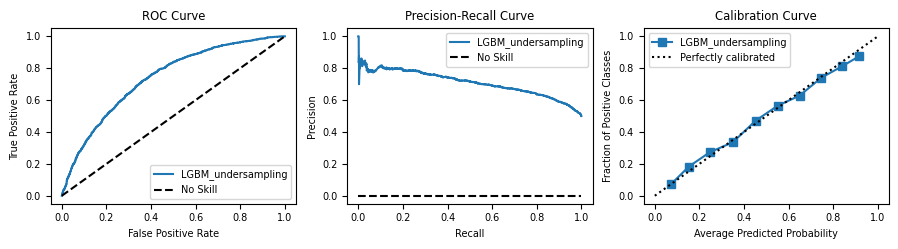

ROC AUC ROC AUC 5-CV train set (train and validate)  \
LGBM_undersampling train    0.773                                0.87 ± 0.001   
                   test     0.678                               0.721 ± 0.008   

                          precision  recall  f1-score  accuracy  
LGBM_undersampling train      0.750   0.820     0.783     0.773  
                   test       0.664   0.722     0.691     0.678

In [39]:
# fit the model
LGBM_undersampling = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 42, verbose = 0)
LGBM_undersampling.fit(X_train, y_train)

# evaluate the model
df_LGBM_undersampling = model_eval(LGBM_undersampling, 'LGBM_undersampling', X_train, X_test, y_train, y_test, show_plots = True)
df_LGBM_undersampling

### Oversampling strategy (ADASYN)

In this section we will perform over-sampling strategy using ADASYN algorithm (see this [link](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html) for further details) in order to make the target class `booking_complete` more balanced.

> Key takeaways:
> - This model has been improved too way much which is really very good for us!
> - All evaluation metric scores (`ROC`, `precision`, `recall`, `f1-score`, and even `accuracy`) are very high, and I didn't expect to get a model such this perfect.
> - The model is not relatively well-calibrated when the range of avg predicted probability is 0.7 to 0.9, meaning the model has too many False Negative samples. Perhaps by doing hyperparameter tuning we can get a better well-calibrated model.

In [40]:
from imblearn.over_sampling import ADASYN

# perform oversampling - ADASYN
oversampling = ADASYN(sampling_strategy = 'auto', n_neighbors = 5, n_jobs = -1, random_state = 42)
X = df_modeling_preprocessed.drop(target, axis = 1)
y = df_modeling_preprocessed[target]
X, y = oversampling.fit_resample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# check the data
print(f'X_train shape: {X_train.shape} | y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} | y_test shape: {y_test.shape}')
# class_distribution(y_train, 'y_train', 'booking_complete')

X_train shape: (59686, 19) | y_train shape: (59686, 1)
X_test shape: (25580, 19) | y_test shape: (25580, 1)


========================= model evaluation - LGBM_oversampling =========================
Classification Report on Test Set: 
              precision    recall  f1-score   support

 non-default       0.84      0.99      0.91     12567
     default       0.99      0.82      0.90     13013

    accuracy                           0.91     25580
   macro avg       0.92      0.91      0.91     25580
weighted avg       0.92      0.91      0.91     25580

Confusion Matrix on Test Set: 
[[12487    80]
 [ 2333 10680]]


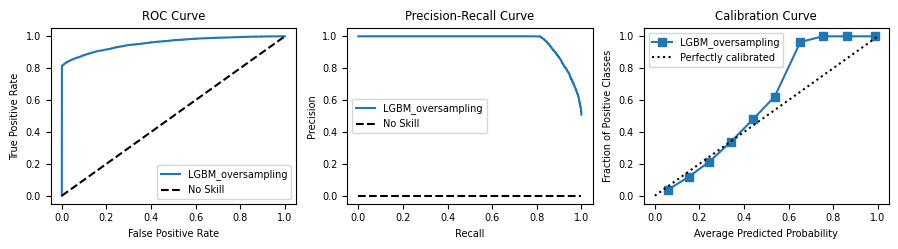

ROC AUC ROC AUC 5-CV train set (train and validate)  \
LGBM_oversampling train    0.908                                 0.964 ± 0.0   
                  test     0.906                               0.953 ± 0.001   

                         precision  recall  f1-score  accuracy  
LGBM_oversampling train      0.996   0.823     0.901     0.908  
                  test       0.993   0.821     0.898     0.906

In [41]:
# fit the model
LGBM_oversampling = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 42, verbose = 0)
LGBM_oversampling.fit(X_train, y_train)

# evaluate the model
df_LGBM_oversampling = model_eval(LGBM_oversampling, 'LGBM_oversampling', X_train, X_test, y_train, y_test, show_plots = True)
df_LGBM_oversampling

### Class weighting strategy

In this section we use class weighting strategy where we tell the `LGBMClassifier` to give more weight to the minority class and five lesser weight to the majority class so that  they both class are balanced.

> Key takeaways:
> - This model doesn't perform really well. 
> - It has very low evaluation metric scores such as `precision` and `f1-score` (below 0.5). 
> - The model also is not well-calibrated where the model has too many False Positive samples.

In [42]:
# split the data
X = df_modeling_preprocessed.drop(target, axis = 1)
y = df_modeling_preprocessed[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# check the data
print(f'X_train shape: {X_train.shape} | y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} | y_test shape: {y_test.shape}')
# class_distribution(y_train, 'y_train', 'booking_complete')

X_train shape: (34496, 19) | y_train shape: (34496, 1)
X_test shape: (14785, 19) | y_test shape: (14785, 1)


========================= model evaluation - LGBM_class_weight =========================
Classification Report on Test Set: 
              precision    recall  f1-score   support

 non-default       0.93      0.67      0.77     12568
     default       0.27      0.70      0.39      2217

    accuracy                           0.67     14785
   macro avg       0.60      0.68      0.58     14785
weighted avg       0.83      0.67      0.72     14785

Confusion Matrix on Test Set: 
[[8367 4201]
 [ 673 1544]]


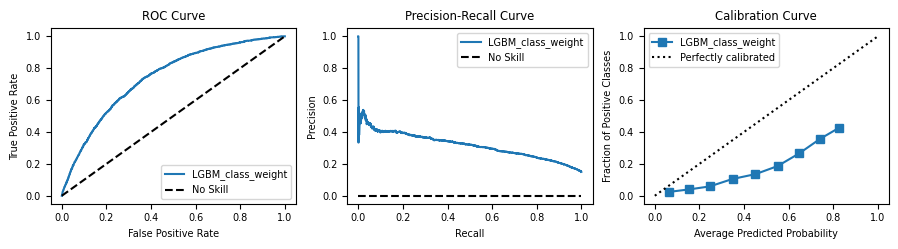

ROC AUC ROC AUC 5-CV train set (train and validate)  \
LGBM_class_weight train    0.702                               0.834 ± 0.001   
                  test     0.670                               0.738 ± 0.004   

                         precision  recall  f1-score  accuracy  
LGBM_class_weight train      0.312   0.819     0.452     0.702  
                  test       0.269   0.696     0.388     0.670

In [43]:
# fit the model 
LGBM_class_weight = LGBMClassifier(class_weight = 'balanced', objective = 'binary', n_jobs = -1, random_state = 42, verbose = 0)
LGBM_class_weight.fit(X_train, y_train)

# evaluate the model
df_LGBM_class_weight = model_eval(LGBM_class_weight, 'LGBM_class_weight', X_train, X_test, y_train, y_test, show_plots = True)
df_LGBM_class_weight

## Model evaluation

At this point, We have trained 4 ML models using `LightGBM` algorithm,
- `LGBM_baseline` &rarr; a baseline model where we don't perform any special approach to handle imblanced class, `booking_complete`.
- `LGBM_undersampling`  &rarr; a model where we trained it using random under-sampling strategy to handle imblanced class.
- `LGBM_oversampling`  &rarr; a model where we trained it using over-sampling strategy, specifically Adaptive Synthetic (ADASYN) algorithm to handle imblanced class.
- `LGBM_class_weight` &rarr; a model where we trained it using class weighting strategy by giving more weight for major class and giving less weight for minor class.

> Key takeaways:
> - Based on the overall evaluation metrics resulted by each model explained above, we found that the one performing the best is `LGBM_oversampling` where we can see that all the evaluation metrics has improved a way more perfect than ever!
> - If we notice at the `ROC AUC 5-CV train set (train and validate)` on train and test sets (`0.964` and `0.953`), the model doesn't suffer from neither underfitting nor overfitting!
> - But there is a little problem to this "perfect model" where it is not well-calibrated at predicted probabilites above 0.6 to 0.9. Perhaps with hyperparameter tuning, we can overcome this issue.

In [44]:
model_evaluation = pd.concat([df_LGBM_baseline,
                              df_LGBM_undersampling,
                              df_LGBM_oversampling,
                              df_LGBM_class_weight], axis = 0)
model_evaluation

ROC AUC ROC AUC 5-CV train set (train and validate)  \
LGBM_baseline      train    0.856                               0.839 ± 0.002   
                   test     0.849                               0.738 ± 0.005   
LGBM_undersampling train    0.773                                0.87 ± 0.001   
                   test     0.678                               0.721 ± 0.008   
LGBM_oversampling  train    0.908                                 0.964 ± 0.0   
                   test     0.906                               0.953 ± 0.001   
LGBM_class_weight  train    0.702                               0.834 ± 0.001   
                   test     0.670                               0.738 ± 0.004   

                          precision  recall  f1-score  accuracy  
LGBM_baseline      train      0.810   0.051     0.096     0.856  
                   test       0.437   0.027     0.050     0.849  
LGBM_undersampling train      0.750   0.820     0.783     0.773  
                   test       0.664   0.722     0.691     0.678  
LGBM_oversampling  train      0.996   0.823     0.901     0.908  
                   test       0.993   0.821     0.898     0.906  
LGBM_class_weight  train      0.312   0.819     0.452     0.702  
                   test       0.269   0.696     0.388     0.670

## Hyperparameter tuning

Note that the best model that we have trained so far is `LGBM_oversampling` trained using oversampled dataset, using ADASYN algorithm. Now will try to tune the hyperparameters within the `LightGBM` model, perhaps we can get more better performance ever.

> Key takeaways:
> - Well, as we would expect, the model is getting even better. You can see that the model is pretty well-calibrated too.
> - We will use this model as the final model which is saved in variable - `LGBM_oversampling_tuned`.
> - Note that I have already done the hyperparameter tuning, and saved the best model locally in my disk with a filename called "LGBM_oversampling_tuned.sav". From here we don't need to do the hyperparameter tuning again, we could just load our saved model and give comment the codes for hyperparameter tuning process.
> - It will take about 3 minutes to do the hyperparameter tuning process using `RandomizedSearchCV` algorithm where `50` candidates are evaluated given a subset of hyperparameter for each candidate.
> <img src="image/task 2/hyperparameter tuning time.png" width="400">

In [45]:
# perform oversampling - ADASYN
oversampling = ADASYN(sampling_strategy = 'auto', n_neighbors = 5, n_jobs = -1, random_state = 42)
X = df_modeling_preprocessed.drop(target, axis = 1)
y = df_modeling_preprocessed[target]
X, y = oversampling.fit_resample(X, y)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [46]:
%%time
### UNCOMMENT THIS CODES IF YOU WANT TO PERFORM HYPERPARAMETER TUNING ###

# # define hyperparameters 
# from scipy.stats import randint, uniform, reciprocal
# np.random.seed(42)
# param_grid = {
#     'boosting_type': ['gbdt', 'dart', 'goss'],
#     'n_estimators': randint(100, 750),
#     'learning_rate': reciprocal(0.05, 1),
#     'max_depth': randint(5, 20),
#     'num_leaves': randint(10, 100),
#     'reg_alpha': uniform(0, 1),
#     'reg_lambda': uniform(0, 1),
#     'colsample_bytree': uniform(0.5, 1),
#     'subsample':  uniform(0.5, 1)
#     }

# # create RandomizedSearchCV object
# from sklearn.model_selection import RandomizedSearchCV
# model = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 42, verbose = -100, silent = True)
# random_search_cv = RandomizedSearchCV(estimator = model,
#                                       param_distributions = param_grid,
#                                       cv = 5, scoring = 'roc_auc', n_iter = 50,
#                                       n_jobs = -1, random_state = 42, verbose = 1)
# # fit the model
# random_search_cv.fit(X_train, y_train)

# # get the best model
# LGBM_oversampling_tuned = random_search_cv.best_estimator_

CPU times: total: 0 ns
Wall time: 0 ns


In [47]:
## save the best model
# pickle.dump(LGBM_oversampling_tuned, open('model/LGBM_oversampling_tuned.sav', 'wb'))

========================= model evaluation - LGBM_oversampling_tuned =========================
Classification Report on Test Set: 
              precision    recall  f1-score   support

 non-default       0.86      0.98      0.92     12567
     default       0.98      0.84      0.91     13013

    accuracy                           0.91     25580
   macro avg       0.92      0.91      0.91     25580
weighted avg       0.92      0.91      0.91     25580

Confusion Matrix on Test Set: 
[[12343   224]
 [ 2059 10954]]


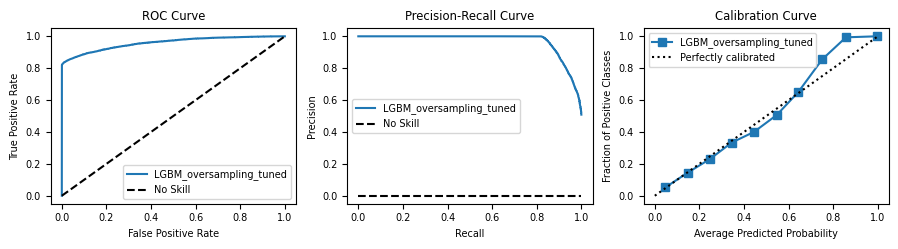

In [48]:
# load the best model
LGBM_oversampling_tuned = pickle.load(open('model/LGBM_oversampling_tuned.sav', 'rb'))

# evaluate the best model
df_LGBM_oversampling_tuned = model_eval(LGBM_oversampling_tuned, 'LGBM_oversampling_tuned', X_train, X_test, y_train, y_test, show_plots = True)

In [49]:
# compare between un-tuned and tuned model
best_model_evaluation = pd.concat([df_LGBM_oversampling, 
                                   df_LGBM_oversampling_tuned], axis = 0)
best_model_evaluation

ROC AUC  \
LGBM_oversampling       train    0.908   
                        test     0.906   
LGBM_oversampling_tuned train    0.936   
                        test     0.911   

                              ROC AUC 5-CV train set (train and validate)  \
LGBM_oversampling       train                                 0.964 ± 0.0   
                        test                                0.953 ± 0.001   
LGBM_oversampling_tuned train                                 0.992 ± 0.0   
                        test                                0.954 ± 0.001   

                               precision  recall  f1-score  accuracy  
LGBM_oversampling       train      0.996   0.823     0.901     0.908  
                        test       0.993   0.821     0.898     0.906  
LGBM_oversampling_tuned train      0.998   0.877     0.934     0.936  
                        test       0.980   0.842     0.906     0.911

## Model interpretation

The best model that we have got so far is `LGBM_oversampling_tuned` which is `LightGBM` model that was trained on oversampled dataset using ADASYN algorithm and was tuned using `RandomizedSearchCV` algorithm.

### Feature importances

Feature importance is one of many machine learning model interpretation techniques. It will rank each feature based on how many times each feature has been used to split the trees within the `LightGBM` model. The more a feature is used to split trees, the more important it is.

> Key takeaways:
> - The top 5 most importance features are 
>     - `purchase_lead`,
>     - `length_of_stay`
>     - `flight_duration`, 
>     - `flight_hour` which is separated to `flight_hour_SIN` X `flight_hour_COS`, 
>     - `flight_day` which is separated to `flight_day_SIN` X `flight_day_COS`.
> - Our engineered `flight_hour` and `flight_day` are included as the top 5 most importance features within the model! This is what we expect from EDA section previously where there is a tendency of customers to complete their bookings when choosing a particular `flight_hour`, that is "Afternoon Flights".
> - Surprisingly it looks like that choosing a particular `flight_day` affects customers behaviour to complete their bookings.
> - The bottom most important features is `trip_type` which is pretty obvious since this feature has a dominant value to "RoundTrip".
> - **Please note that** "Feature Importances" does **NOT** tell us how each feature contributes to the output model. It just tells us how many times each feature is used within the model.

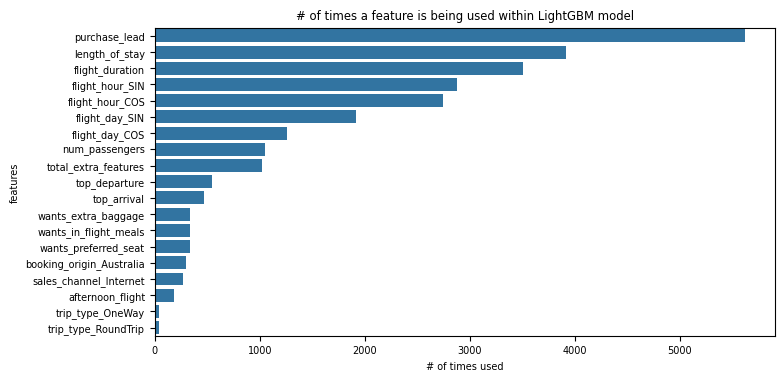

In [50]:
feature_importance = pd.DataFrame({'feature':LGBM_oversampling_tuned.feature_name_,
                                   'importance':LGBM_oversampling_tuned.feature_importances_}).sort_values('importance', ascending = False).reset_index(drop = True)
feature_importance['rank'] = np.arange(1, feature_importance.shape[0] + 1)
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(data = feature_importance, y = 'feature', x = 'importance', ax = ax)
ax.set(title = '# of times a feature is being used within LightGBM model', xlabel = '# of times used', ylabel = 'features')
plt.show()

fig.savefig('image/task 2/feature importances.png', bbox_inches = 'tight', dpi = 300)

# Recommendations

- Seems there is particular preference from customers of choosing **Afternoon Flights**, we have to ask their reasons of why they choose a particular **Flight Hour**. By doing so, we can further analyze and make even better strategy to meet their needs.
- Focus on **developing business strategy** in **Afternoon Flights**, specifically for those having **short trip and stay duration**. Such as,
    - Increasing the number of aircraft for **Afternoon Flights** so that sufficient seat stock is always available.
    - Offering a promo/discount in **Afternoon Flights** for increasing the amount of bookings.  Such as 
        - giving them **higher flight discount** if they want to add 3 extra features i.e. baggage, preferred seat, and meals.
        - making a **product bundling** of extra baggage and meals or performing **upselling strategy** e.g if a customer wants extra baggage, we can offer to her/him an extra meals with lower price.

# Reference

1. [Handling cyclical features, such as hours in a day, for machine learning pipelines with Python example](https://www.sefidian.com/2021/03/26/handling-cyclical-features-such-as-hours-in-a-day-for-machine-learning-pipelines-with-python-example/)
2. [lightgbm.LGBMClassifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)